Certaines fonctionnalités de Python ne sont pas chargées dans l'environnement, il faut alors les importer sous forme de modules.

### Import simple 

In [1]:
import matplotlib.pyplot  # mauvaise
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import degrees as dg
import math as m
from math import cos
import math

In [2]:
math.cos(12)

0.8438539587324921

### Importer un objet spécifique d'un module 

In [4]:
cos(12)

0.8438539587324921

### importer avec un alias

In [50]:
m.cos(12)

0.8438539587324921

### Importer un objet spécifique d'un module avec un alias

In [7]:
dg(1)

57.29577951308232

### Importer un sous module d'une librairie

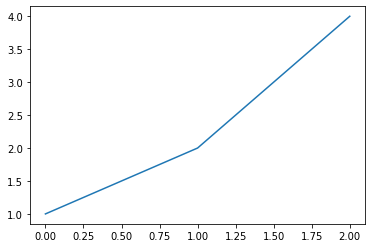

In [54]:
matplotlib.pyplot.plot([1, 2, 4])

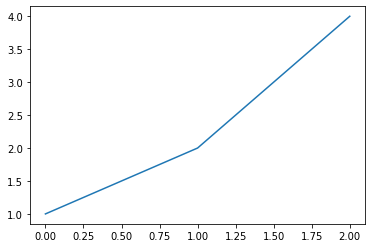

In [56]:
pyplot.plot([1, 2, 4])

### Importer un sous module d'une librairie avec un alias

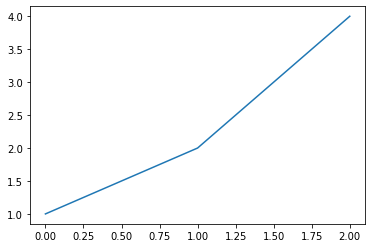

In [58]:
plt.plot([1, 2, 4])

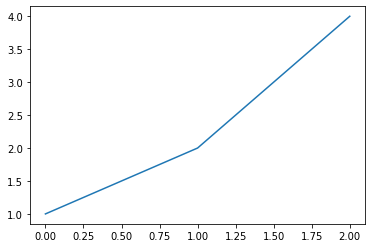

In [2]:
plt.plot([1, 2, 4])

### Installer une librairie externe

Deux cas de figure:
1. Disponible sur Python Package Index (pypi.org)
2. Non disponible sur pypi

#### Disponible sur Pypi (99% du temps)

### Dans l'environnement virtuel executer `pip install -m nom_du_package`

Si on n'utilise pas d'environnement virtuel (et ce n'est pas bien), on peut faire :

In [2]:
! pip install nom_du_package

ERROR: Could not find a version that satisfies the requirement nom_du_package
ERROR: No matching distribution found for nom_du_package


In [3]:
! pip install seaborn --yes